### 3. Quantization of Categorical Variable

When we analyze the car sales data, we have the following

In [3]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read training data from csv file to dataframe
df = pd.read_csv('TrainingData.csv')
#display data types
df.dtypes

Unnamed: 0            int64
ID                    int64
Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod_year             int64
Category             object
Leather_interior     object
Fuel_type            object
Engine_volume       float64
Turbo                object
Mileage               int64
Cylinders             int64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

We can see there are columns data are "object" type. Which mean they are categorical variables. We cannot use categorical variables in the linear regression model. We have to quantize the categorical varibles to a integer or flow data type. After research we found following two methods that can use for categorical variable quantization.

#### 3.1 Quantization with Calculating Group Mean

First option of variable quntization is calculated group mean against Price. Then find proper digit for every different category type, then assigned the number. Where we will use Category column data as a test. We display all the different type of data in the category column:

In [4]:
print(df.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


We can see there are 11 types for data in Category columne. Now we need calculated Group mean price for each different type of car category:

In [7]:
# Make sure price data type is int
data_types = {}
data_types['Price'] = 'int32'
df = df.astype(data_types)
# store call type of cars in array
categoryarray = df.Category.unique()
# Creaete Price mean array
pricemeanarray = []
# Create Standard Deviations array
pricesdarray = []
#for loop calculate mean and SD for every type of car
for x in categoryarray:
    comm = "Category == '"+x+"'"
    df2 = df.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))
#print results
print("Group Mean Price is ", pricemeanarray)
print("Standard Deviation is ",pricesdarray)
print("Group Name is", categoryarray)

Group Mean Price is  [23927.76, 11509.12, 14261.48, 17483.68, 10101.57, 22919.33, 20849.0, 20655.98, 22713.38, 13856.0, 27078.91]
Standard Deviation is  [23895.86, 9099.94, 14492.03, 11025.5, 9177.41, 17805.5, 31293.12, 14400.32, 24383.81, 13314.98, 27637.63]
Group Name is ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


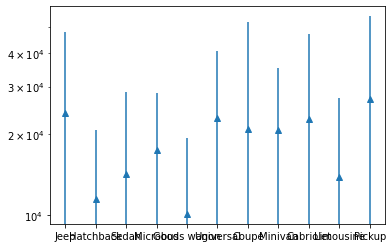

In [9]:
#plot the data for review and set price axis at log for better visibility
fig, ax = plt.subplots()
ax.errorbar(categoryarray, pricemeanarray, pricesdarray, linestyle='None', marker='^')
ax.set_yscale('log')

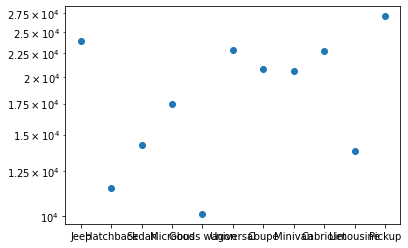

In [10]:
#plot data without standard deviations
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

Now bese on the price mean in every type car, we can find the max price and min price for normalization. base on $Unit Step = \frac {Max Price - Min Price}{1000}$. And assign the unit step price back to every typ of car for a number in the $(0, 1)$ interval.

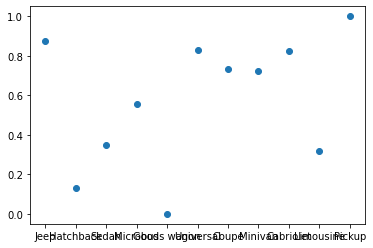

In [15]:
#imprt numpy library
import numpy as np
pricemeanarrayln = np.log(pricemeanarray)
#find max mean and min mean and calcuate unit step
minimean = pricemeanarrayln.min()
unitstep = (pricemeanarrayln.max()-pricemeanarrayln.min())/1000
#assign the unit step back to every car type
pricemeanarraynormal = (pricemeanarrayln - minimean)/unitstep/1000
#Plot data for better visibility
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarraynormal)

In [14]:
#loop to print out all different number assignment for the car category
j = len(categoryarray)
i = 0
for i in range(j):
    print(categoryarray[i], "normallization number is ", pricemeanarraynormal[i])
    i = i+1

Jeep normallization number is  0.8745356666201155
Hatchback normallization number is  0.13229249056919942
Sedan normallization number is  0.349745270699173
Microbus normallization number is  0.5563298412491332
Goods wagon normallization number is  0.0
Universal normallization number is  0.8308685039568255
Coupe normallization number is  0.7348558300196918
Minivan normallization number is  0.7254232613366441
Cabriolet normallization number is  0.8217144550817334
Limousine normallization number is  0.32049378734106937
Pickup normallization number is  0.9999999999999999


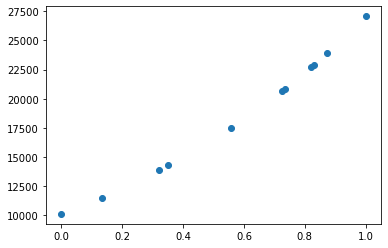

In [17]:
#plot data with number assigned to every different car category
fig, ax = plt.subplots()
ax.scatter(pricemeanarraynormal, pricemeanarray)

We can see that we should be able to use this mothed for the Category Column. However, we also found another solution for variable quantization called One-Hot-Encoding.

#### 3.2 One-Hot-Encoding (Add Dummies)

After more research, we found another solution for variable quantization is called One-Hot_Encoding which is adding dummy variable columnes for every category and substract one $n-1$. We will test this in Category Column again:

In [18]:
print(df.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


Again, we see there are 11 different car categories in total. Now we apply One-Hot-Encoding to Category columns simply by using get_dummies() fuction in Pandas dataframe 

In [21]:
#assign category data out to categry sub data frame for testing
category = df.Category
#try one-hot-encoding
pd.get_dummies(category)

,Cabriolet,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13448,0,0,0,0,0,0,0,0,0,1,0
13449,0,0,0,0,0,0,0,0,0,1,0
13450,0,0,0,1,0,0,0,0,0,0,0
13451,0,0,0,0,1,0,0,0,0,0,0


Now we can try this in the main training data frame:

In [22]:
pd.get_dummies(df, columns=["Category"], drop_first = True)

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Leather_interior,Fuel_type,Engine_volume,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Yes,Hybrid,3.5,...,0,0,0,1,0,0,0,0,0,0
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,No,Petrol,3.0,...,0,0,0,1,0,0,0,0,0,0
2,2,45774419,8467,0,HONDA,FIT,2006,No,Petrol,1.3,...,0,0,1,0,0,0,0,0,0,0
3,3,45769185,3607,862,FORD,ESCAPE,2011,Yes,Hybrid,2.5,...,0,0,0,1,0,0,0,0,0,0
4,4,45809263,11726,446,HONDA,FIT,2014,Yes,Petrol,1.3,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Yes,LPG,3.0,...,0,0,0,0,0,0,0,0,1,0
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Yes,Petrol,1.6,...,0,0,0,0,0,0,0,0,1,0
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,No,Hybrid,1.8,...,0,0,1,0,0,0,0,0,0,0
13451,13465,45647811,1019,917,BMW,X5,2013,Yes,Diesel,3.0,...,0,0,0,1,0,0,0,0,0,0


Looks like one-hot-encoding is much simply solution compare to calculate group mean.

#### 3.3 Conclution

After research, we have found that there are two method for variable quantization. One if calculate group mean and one is One-Hot-Encoding. As group we have decide to use One-Hot-Encoding for all the categorical variable columns except two columns. Which are Manufacture and Models. We can see following:

In [27]:
print("Total unique value in Manufacturer columne is ",len(df.Manufacturer.unique()))
print("Total unique value in Model columne is ",len(df.Model.unique()))

Total unique value in Manufacturer columne is  64
Total unique value in Model columne is  1227


These number are large and Model is heavely depend on manufacturer (we will show that in following section). Then we decide to use group mean calculation for these two columns.